# Exploring the claimant reliability dataset
_Run with Python3.10.12_

In [2]:
# import requirements

import os
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable

In [3]:
# code for loading the dataset

from util import gather_dataset

# load the dataset using custom function
df = gather_dataset('./data/claimant_data/')

df.head()

,worker_id,task_id,task_response_id,file_id,sentence,tokens_id,publisher,source,reliability,Optional Comments:,batch_no,score
0,23QWQCPZ7PNP,f79dff90-7723-4c33-9582-33e46ab6176c,15d3b8d0-d17f-49b2-bb2f-c113957cddf7,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5
1,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3
2,9R3XRNAAW7RR,f040bde3-4c11-482c-b7e3-4bd080b1a7f7,2c7856c7-0bc6-4f40-9781-37b6942a2e36,PublicHealth-org_20170623T200727.conll.annot,14,1 2,PublicHealth.org,The article,5 - The source is fully reliable,NaN,1,5
3,MWHG9Y6DNGR9,f79dff90-7723-4c33-9582-33e46ab6176c,e2b709b8-16f3-4bc4-b513-8c2f28f0f1e1,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5
4,D7HVJTEKMYNW,e3f62e34-fb40-4bda-a5b4-acd3d72c1160,f16d6d05-ab57-4117-85b5-8c87fcd5a689,National-Vaccine-Information-Center-(NVIC)_201...,26,5 6,National Vaccine Information Center (NVIC),Dr. Cherry,5 - The source is fully reliable,NaN,1,5


In [4]:
# wrapper for printing results of functions

def print_formatting(func: Callable) -> Callable:
    """Decorator for printing formatting around the function prints"""

    def wrapper(*args, **kwargs):
        padd = '-'
        print(f'{" "+func.__name__+"() ":{padd}^80}')
        docstring = f'"""{func.__doc__}"""'
        print(f'{docstring:^80}\n')
        func(*args, **kwargs)
        print('-' * 80 + '\n')

    return wrapper


In [5]:
@print_formatting
def find_pilot_duplicates(pilot_path: str) -> None:
    """Test if there are duplicates of the text in the pilot in the other batches"""

    pilot_df = pd.read_csv(pilot_path)

    main_df = pd.DataFrame()
    data_path = '/'.join(pilot_path.split('/')[:-1]) + '/'
    for file in os.listdir(data_path):
        if file.endswith('.csv') and not file.endswith('b1.csv'):
            main_df = pd.concat([main_df, pd.read_csv(os.path.join(data_path, file))])


    overlap = pd.merge(pilot_df, main_df, how='inner', on=['publisher','sentence', 'tokens_id'])

    if overlap.empty:
        print('No duplicates found')
    else:
        print('Duplicates found:')
        print(overlap.to_string())
    
find_pilot_duplicates('./data/claimant_data/aggregated/Rating the Reliability of Sources and Publishers - b1.csv')

--------------------------- find_pilot_duplicates() ----------------------------
"""Test if there are duplicates of the text in the pilot in the other batches"""

No duplicates found
--------------------------------------------------------------------------------



## Basic Overview

---------------------- reliability_scores_distribution() -----------------------
     """Prints the distribution of the (reliability) scores in a column"""      

score
0     360
1    2487
2    3306
3    5311
4    3266
5    2570
Name: count, dtype: int64
--------------------------------------------------------------------------------



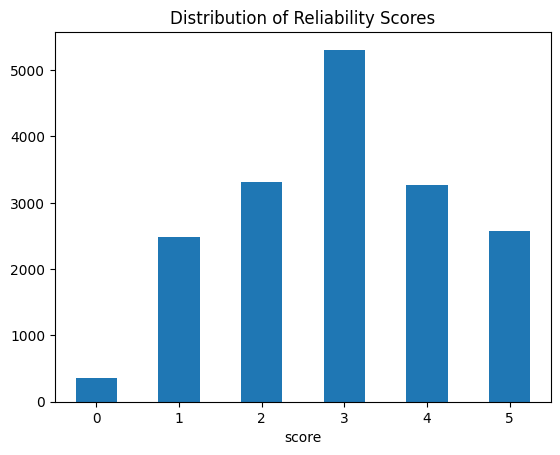

In [6]:
@print_formatting
def reliability_scores_distribution(column: pd.Series) -> None:
    """Prints the distribution of the (reliability) scores in a column"""

    print(column.value_counts().sort_index())

    # df.hist(column='z_score', bins=10, grid=False)
    column.value_counts().sort_index().plot(kind='bar', title='Distribution of Reliability Scores', rot=True)

reliability_scores_distribution(df['score'])

### Worker statistics

In [7]:
# count how many workers participated in the task

@print_formatting
def count_unique(df: pd.DataFrame, colname: str) -> None:
    """Prints the number of unique values in a column"""

    print(f'{len(df[colname].unique())} different {colname.split("_")[0]}s participated in the task.')

count_unique(df, 'worker_id')

-------------------------------- count_unique() --------------------------------
              """Prints the number of unique values in a column"""              

107 different workers participated in the task.
--------------------------------------------------------------------------------



------------------------ count_judgements_per_worker() -------------------------
                """Prints the number of judgements per worker"""                

Average amount of judgements per worker: 161.682


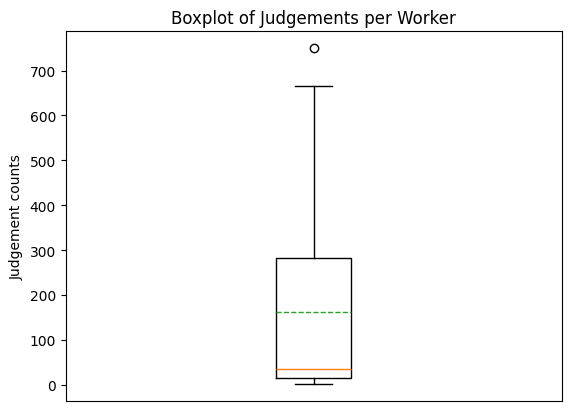

--------------------------------------------------------------------------------



In [8]:
@print_formatting
def count_judgements_per_worker(df: pd.DataFrame) -> None:
    """Prints the number of judgements per worker"""

    # average number of judgements per user
    judgements_per_worker = df['worker_id'].value_counts()
    print(f'Average amount of judgements per worker: {judgements_per_worker.mean():.3f}')

    # boxplot of judgements per user
    plt.boxplot(judgements_per_worker, showmeans=True, meanline=True)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.title('Boxplot of Judgements per Worker')
    plt.ylabel('Judgement counts')
    plt.show()

count_judgements_per_worker(df)

------------------------------ score_per_worker() ------------------------------
              """Prints the mean scores in `colname` per worker"""              

Average reliability score per worker: 2.9448554913294798
Average score per worker:
                  mean  support
worker_id                      
23QWQCPZ7PNP  5.000000        1
2AZWNZRTVACE  2.872727      110
2GKTZAGQYCN4  3.027068      665
2KJAY9AMYRCD  2.390681      279
2ME4D2R27FJK  3.088235      102
2VHW4RE6AKTN  2.400000       15
32MTNCTCCVR6  3.285714       49
36DRXJNMPXGF  2.571705      516
3GM49GZGVH4A  3.458333       24
3HDZDWXPEQAE  2.400000        5
3MEG6THYHV69  3.133333       15
4ACJA6QTDYMG  2.398667      750
4QHKZTW26XFW  3.493506      308
4REVNE2CDF7H  2.936170       47
4TNHZX6VKQAA  3.000000       13
64AFFXCKWR7N  3.296124      645
67HP3WRN63ZJ  3.062500       16
6CNHTCG6W6XM  2.969925      266
72TDDMF6WWVT  2.581356      590
76VNAHQ9VAC3  3.333333       15
7R2NKCJQNXPP  3.060268      448
7YG43VN77NW3  2.68

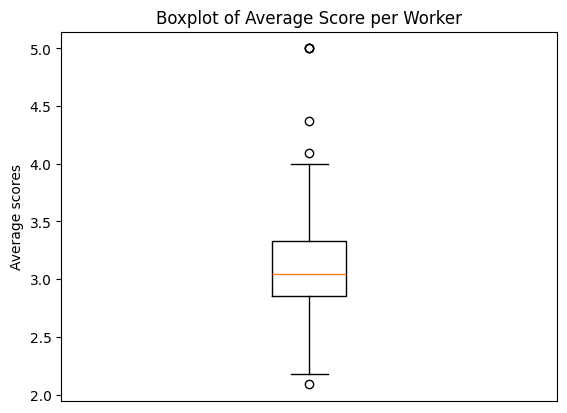

--------------------------------------------------------------------------------



In [9]:
@print_formatting
def score_per_worker(df: pd.DataFrame, colname: str) -> None:
    """Prints the mean scores in `colname` per worker"""
    
    # compute overall average
    print(f'Average reliability score per worker: {df[colname].mean()}')

    # compute average per worker
    scores = pd.merge(df.groupby('worker_id')[colname].mean(), df.groupby('worker_id')[colname].count(), how='inner', on='worker_id')
    scores.rename(columns={'score_x': 'mean', 'score_y': 'support'}, inplace=True)
    print(f'Average {colname} per worker:\n{scores.to_string()}')

    # boxplot of averages per worker
    plt.boxplot(df.groupby('worker_id')[colname].mean())
    plt.title(f'Boxplot of Average {colname.capitalize()} per Worker')
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.ylabel(f'Average {colname}s')
    plt.show()

score_per_worker(df, 'score')

------------------------------ stdev_per_worker() ------------------------------
              """Prints the mean scores in `colname` per worker"""              

Overall standard deviation for all scores: 1.316615156007536
Average score per worker:
                 stdev  support
worker_id                      
23QWQCPZ7PNP       NaN        1
2AZWNZRTVACE  1.502958      110
2GKTZAGQYCN4  1.269138      665
2KJAY9AMYRCD  0.993533      279
2ME4D2R27FJK  1.227595      102
2VHW4RE6AKTN  1.352247       15
32MTNCTCCVR6  1.060660       49
36DRXJNMPXGF  1.332453      516
3GM49GZGVH4A  1.062367       24
3HDZDWXPEQAE  1.516575        5
3MEG6THYHV69  1.552264       15
4ACJA6QTDYMG  1.072660      750
4QHKZTW26XFW  1.366165      308
4REVNE2CDF7H  1.552057       47
4TNHZX6VKQAA  0.816497       13
64AFFXCKWR7N  1.261248      645
67HP3WRN63ZJ  1.436141       16
6CNHTCG6W6XM  1.063564      266
72TDDMF6WWVT  1.105316      590
76VNAHQ9VAC3  0.975900       15
7R2NKCJQNXPP  1.266831      448
7YG43VN77NW3  

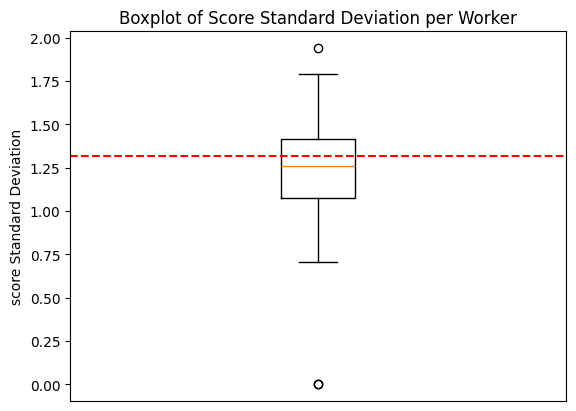

--------------------------------------------------------------------------------



In [40]:

@print_formatting
def stdev_per_worker(df: pd.DataFrame, colname: str) -> None:
    """Prints the mean scores in `colname` per worker"""
    
    # compute overall average
    print(f'Overall standard deviation for all {colname}s: {df[colname].std()}')

    # compute stdev per worker
    scores = pd.merge(df.groupby('worker_id')[colname].std(), df.groupby('worker_id')[colname].count(), how='inner', on='worker_id')
    scores.rename(columns={'score_x': 'stdev', 'score_y': 'support'}, inplace=True)
    print(f'Average {colname} per worker:\n{scores.to_string()}')

    # boxplot of averages per worker
    print(df.groupby('worker_id')[colname].std().fillna(0))
    plt.boxplot(df.groupby('worker_id')[colname].std().dropna())
    plt.title(f'Boxplot of {colname.capitalize()} Standard Deviation per Worker')
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.ylabel(f'{colname} Standard Deviation')
    plt.axhline(df[colname].std(), color='r', linestyle='--', label='Overall Stdev')
    plt.show()

stdev_per_worker(df, 'score')

### Publisher statistics

In [10]:
# count how many unique publishers there are in the dataset
count_unique(df, 'publisher')

-------------------------------- count_unique() --------------------------------
              """Prints the number of unique values in a column"""              

146 different publishers participated in the task.
--------------------------------------------------------------------------------



---------------------------- score_per_publisher() -----------------------------
               """Prints the scores in `colname` per publisher"""               

The mean reliability score per publisher is:

21st Century Wire                                          2.544828
@berkeleywellness                                          2.539683
ABC News                                                   4.000000
AGE OF AUTISM                                              2.000000
Activist Post                                              2.235294
Ars Technica                                               3.196429
Atlas Monitor                                              2.285714
BBC News                                                   3.750000
Backyard Secret Exposed                                    2.300752
Banning-Beaumont CA Patch                                  3.944853
CIDRAP                                                     3.166667
CNN                                        

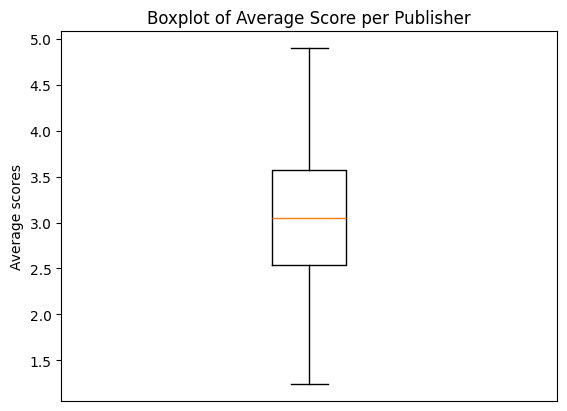

--------------------------------------------------------------------------------



In [11]:
@print_formatting
def score_per_publisher(df: pd.DataFrame, colname: str) -> None:
    """Prints the scores in `colname` per publisher"""

    unique_publishers = df['publisher'].unique()    

    print('The mean reliability score per publisher is:')
    print(df.groupby('publisher')[colname].mean().to_string().lstrip('publisher'))
    print()

    # create boxplot of average scores per publisher
    plt.boxplot(df.groupby('publisher')[colname].mean())
    plt.title(f'Boxplot of Average {colname.capitalize()} per Publisher')
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.ylabel(f'Average {colname}s')
    plt.show()


score_per_publisher(df, 'score')

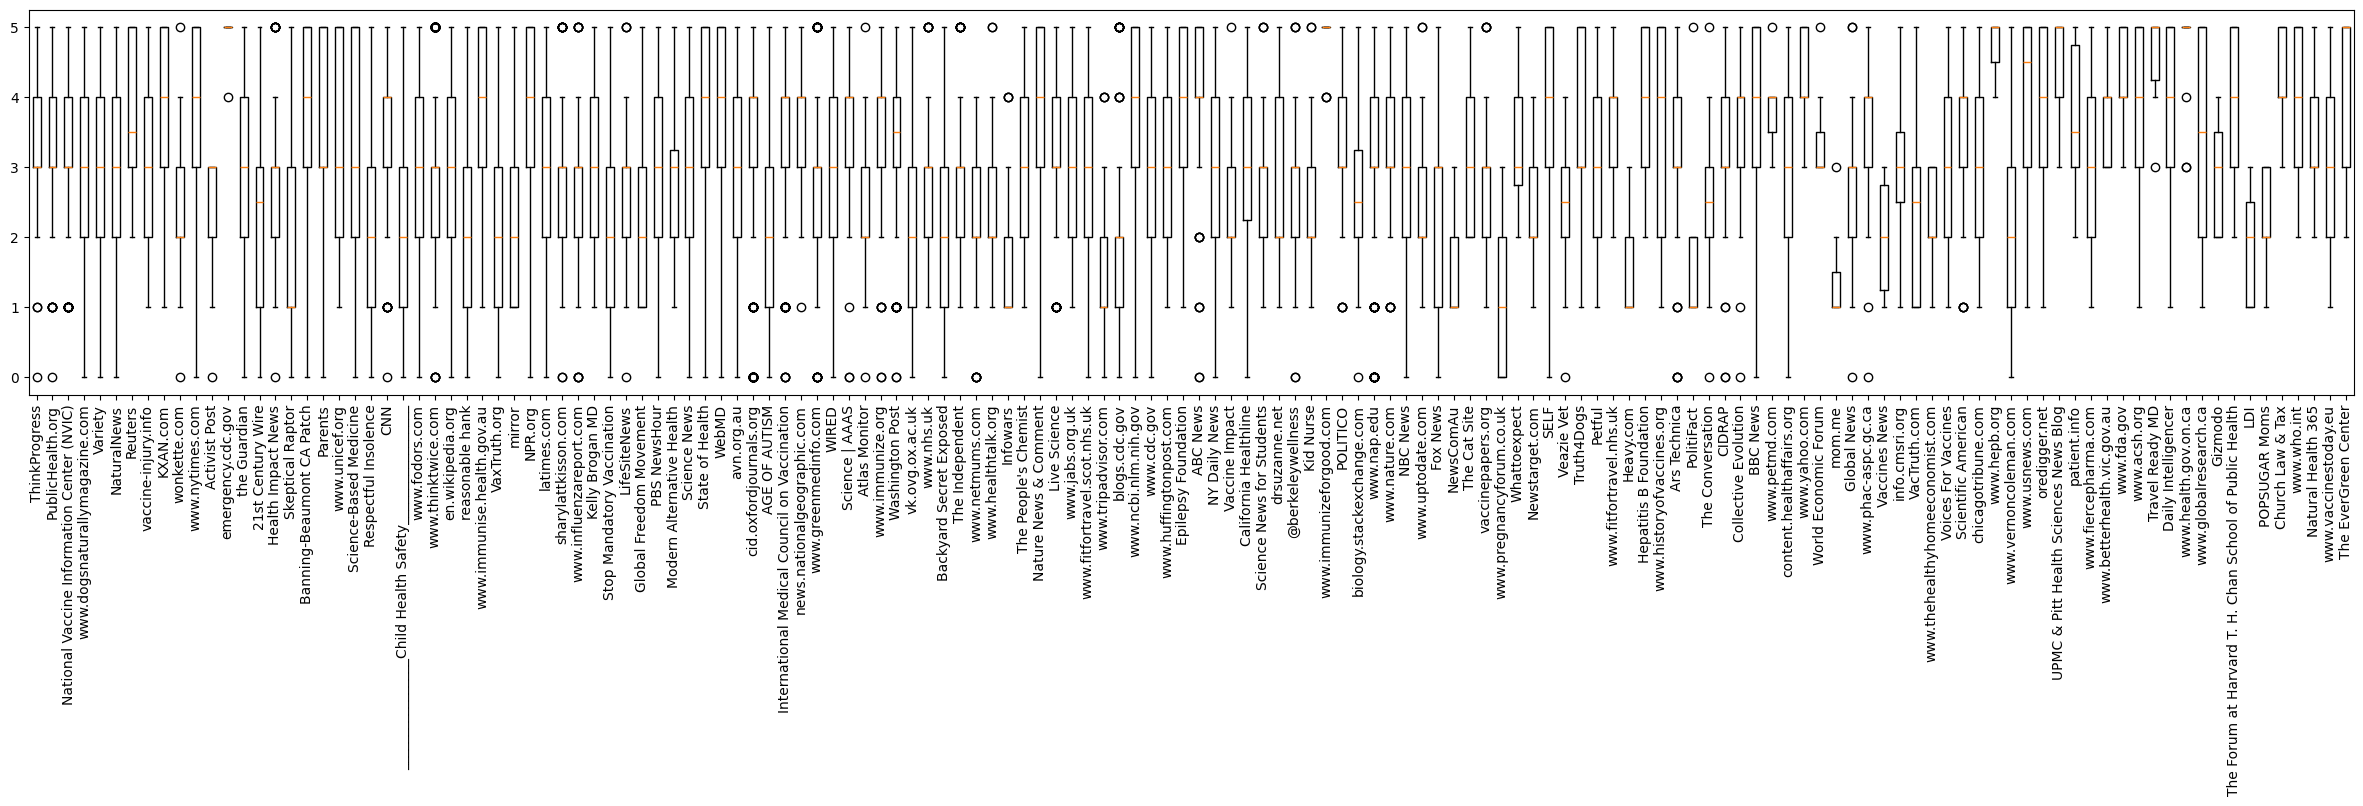

In [12]:
# boxplot per publisher
def boxplot_per_publisher(df: pd.DataFrame, colname: str) -> None:
    """Prints the boxplot of scores in `colname` per publisher"""

    unique_publishers = df['publisher'].unique()    

    # print large overview boxplots
    plt.figure(figsize=(30, 5))
    plt.boxplot([df[df['publisher']==publisher][colname] for publisher in unique_publishers], labels=unique_publishers)
    plt.xticks(rotation=90)
    plt.show()
    
    # uncomment to print boxplot per publisher
    # for publisher in df["publisher"].unique():
    #     df[df["publisher"] == publisher].boxplot(column="score")
    #     plt.title(f"{publisher} (support: {df[df['publisher'] == publisher]['score'].count()})")
    #     plt.show()

boxplot_per_publisher(df, 'score')

## Z-score data and run some visualizations/statistics again

In [13]:
from scipy.stats import zscore

df['z_score'] = zscore(df['score'])
df.head()

,worker_id,task_id,task_response_id,file_id,sentence,tokens_id,publisher,source,reliability,Optional Comments:,batch_no,score,z_score
0,23QWQCPZ7PNP,f79dff90-7723-4c33-9582-33e46ab6176c,15d3b8d0-d17f-49b2-bb2f-c113957cddf7,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5,1.560975
1,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3,0.041885
2,9R3XRNAAW7RR,f040bde3-4c11-482c-b7e3-4bd080b1a7f7,2c7856c7-0bc6-4f40-9781-37b6942a2e36,PublicHealth-org_20170623T200727.conll.annot,14,1 2,PublicHealth.org,The article,5 - The source is fully reliable,NaN,1,5,1.560975
3,MWHG9Y6DNGR9,f79dff90-7723-4c33-9582-33e46ab6176c,e2b709b8-16f3-4bc4-b513-8c2f28f0f1e1,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5,1.560975
4,D7HVJTEKMYNW,e3f62e34-fb40-4bda-a5b4-acd3d72c1160,f16d6d05-ab57-4117-85b5-8c87fcd5a689,National-Vaccine-Information-Center-(NVIC)_201...,26,5 6,National Vaccine Information Center (NVIC),Dr. Cherry,5 - The source is fully reliable,NaN,1,5,1.560975


---------------------- reliability_scores_distribution() -----------------------
     """Prints the distribution of the (reliability) scores in a column"""      

z_score
-2.2368     360
-1.4772    2487
-0.7177    3306
 0.0419    5311
 0.8014    3266
 1.5610    2570
Name: count, dtype: int64
--------------------------------------------------------------------------------



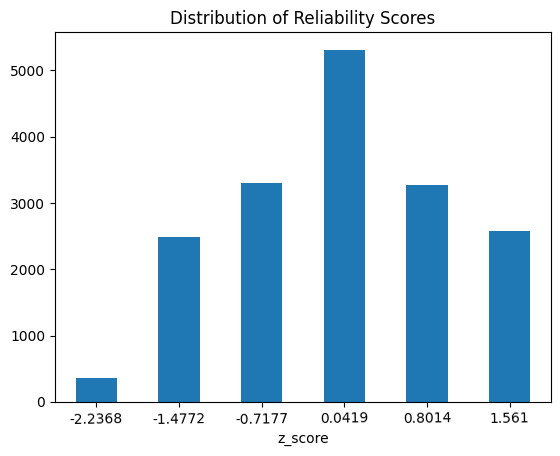

In [14]:
reliability_scores_distribution(df['z_score'].round(4))

### Worker statistics

------------------------------ score_per_worker() ------------------------------
              """Prints the mean scores in `colname` per worker"""              

Average reliability score per worker: -9.857240264880002e-18
Average z_score per worker:
              z_score_x  z_score_y
worker_id                         
23QWQCPZ7PNP   1.560975          1
2AZWNZRTVACE  -0.054785        110
2GKTZAGQYCN4   0.062444        665
2KJAY9AMYRCD  -0.420921        279
2ME4D2R27FJK   0.108903        102
2VHW4RE6AKTN  -0.413842         15
32MTNCTCCVR6   0.258898         49
36DRXJNMPXGF  -0.283424        516
3GM49GZGVH4A   0.390010         24
3HDZDWXPEQAE  -0.413842          5
3MEG6THYHV69   0.143157         15
4ACJA6QTDYMG  -0.414855        750
4QHKZTW26XFW   0.416725        308
4REVNE2CDF7H  -0.006597         47
4TNHZX6VKQAA   0.041885         13
64AFFXCKWR7N   0.266804        645
67HP3WRN63ZJ   0.089356         16
6CNHTCG6W6XM   0.019041        266
72TDDMF6WWVT  -0.276094        590
76VNAHQ9VAC3 

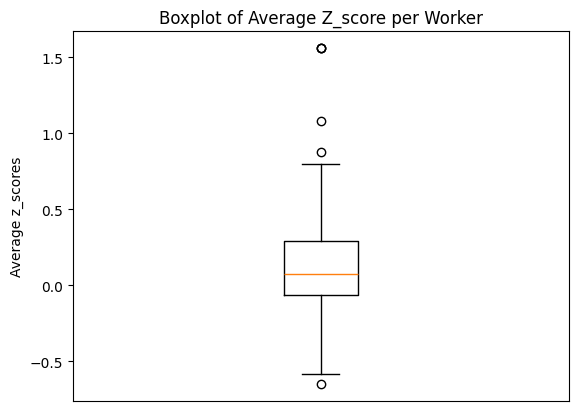

--------------------------------------------------------------------------------



In [15]:
score_per_worker(df, 'z_score')

------------------------------ stdev_per_worker() ------------------------------
              """Prints the mean scores in `colname` per worker"""              

Overall standard deviation for all z_scores: 1.0000289029871297
Average z_score per worker:
              z_score_x  z_score_y
worker_id                         
23QWQCPZ7PNP        NaN          1
2AZWNZRTVACE   1.141565        110
2GKTZAGQYCN4   0.963968        665
2KJAY9AMYRCD   0.754633        279
2ME4D2R27FJK   0.932414        102
2VHW4RE6AKTN   1.027093         15
32MTNCTCCVR6   0.805619         49
36DRXJNMPXGF   1.012058        516
3GM49GZGVH4A   0.806916         24
3HDZDWXPEQAE   1.151908          5
3MEG6THYHV69   1.179015         15
4ACJA6QTDYMG   0.814734        750
4QHKZTW26XFW   1.037664        308
4REVNE2CDF7H   1.178858         47
4TNHZX6VKQAA   0.620166         13
64AFFXCKWR7N   0.957975        645
67HP3WRN63ZJ   1.090814         16
6CNHTCG6W6XM   0.807825        266
72TDDMF6WWVT   0.839537        590
76VNAHQ9VA

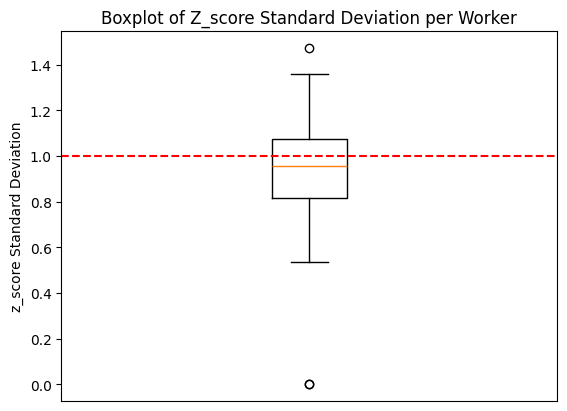

--------------------------------------------------------------------------------



In [41]:
# standard deviation of the workers individually vs the standard deviation of all workers
stdev_per_worker(df, 'z_score')

### Publisher statistics

---------------------------- score_per_publisher() -----------------------------
               """Prints the scores in `colname` per publisher"""               

The mean reliability score per publisher is:

21st Century Wire                                         -0.303839
@berkeleywellness                                         -0.307747
ABC News                                                   0.801430
AGE OF AUTISM                                             -0.717661
Activist Post                                             -0.538944
Ars Technica                                               0.191081
Atlas Monitor                                             -0.500648
BBC News                                                   0.611544
Backyard Secret Exposed                                   -0.489226
Banning-Beaumont CA Patch                                  0.759543
CIDRAP                                                     0.168476
CNN                                        

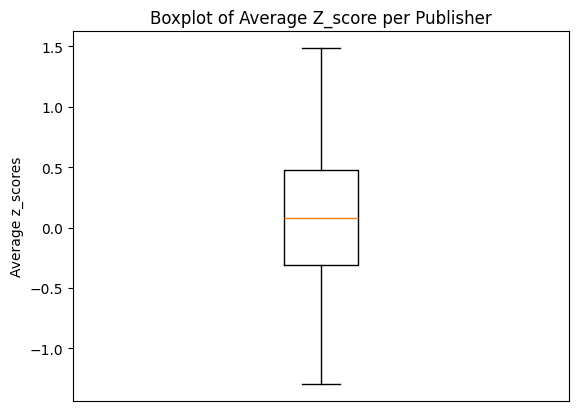

--------------------------------------------------------------------------------



In [17]:
score_per_publisher(df, 'z_score')

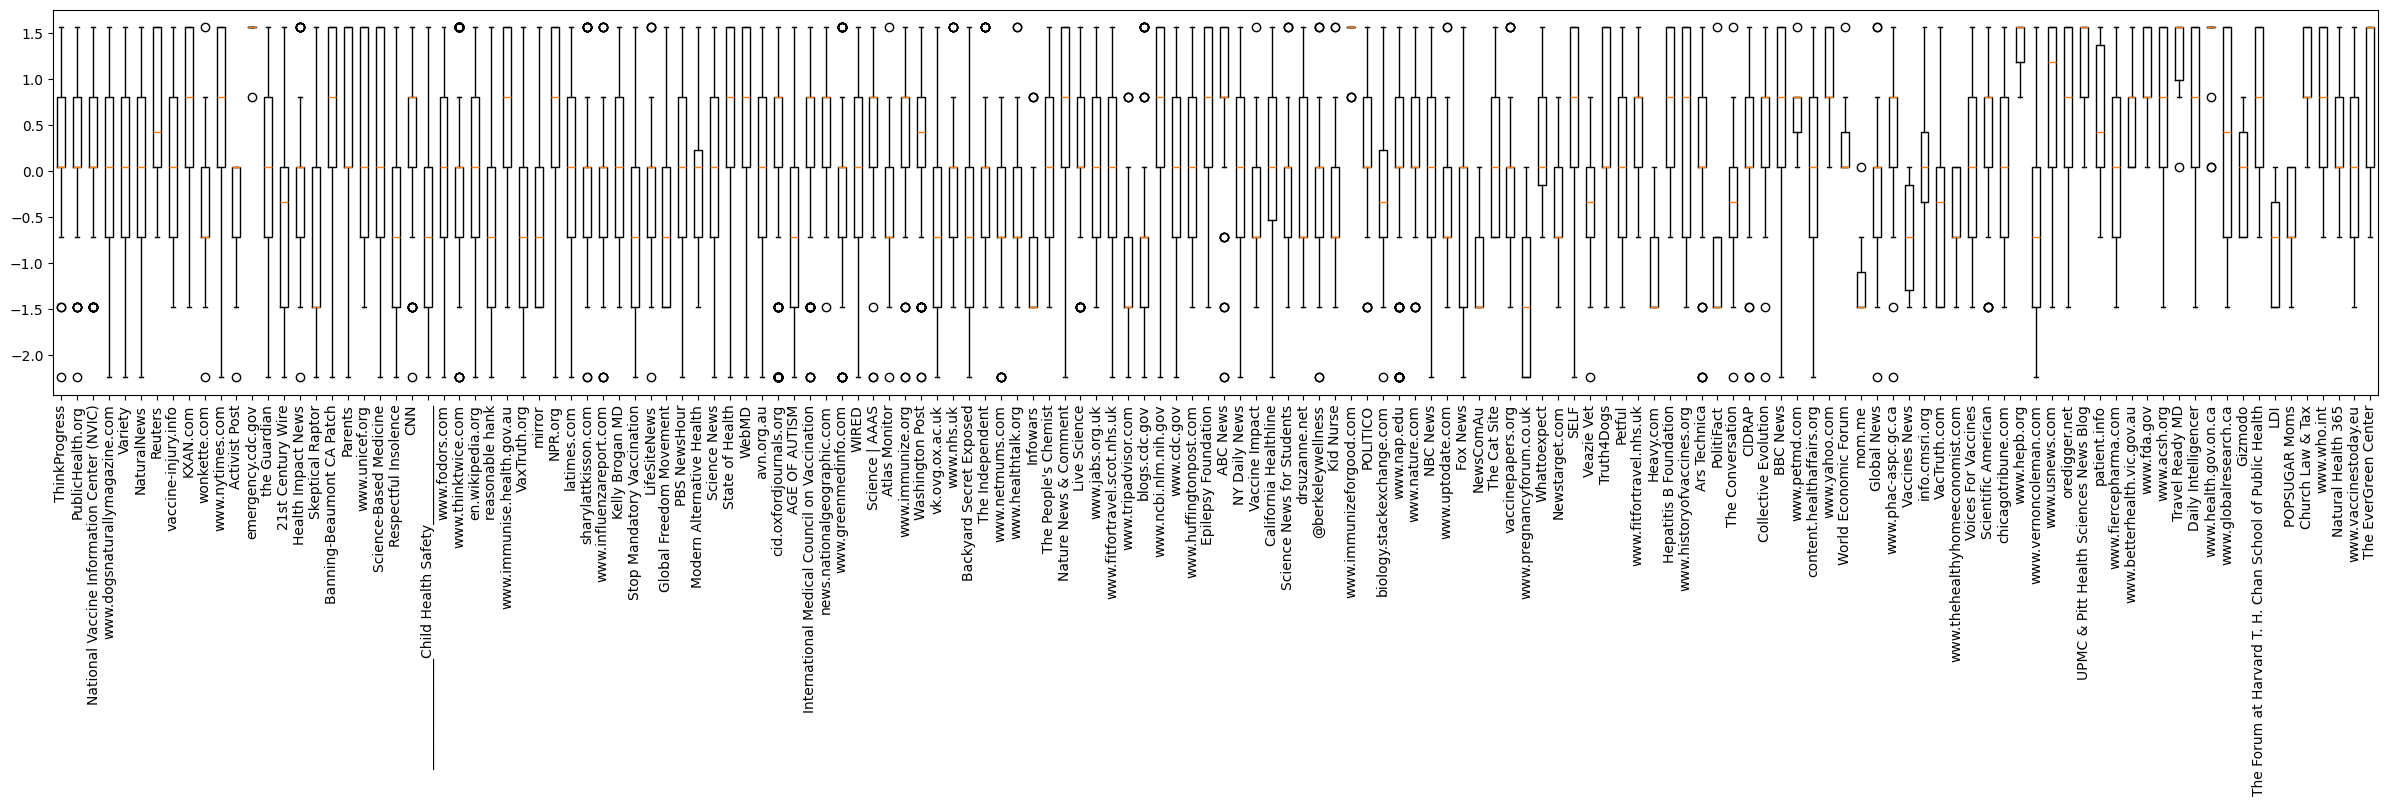

In [18]:
boxplot_per_publisher(df, 'z_score')

## Statistical test to see if there is a difference in score between established/non-established

_All groups: established, non-established, governmental/institutional, other, not\_clear_

In [19]:
from scipy.stats import zscore, normaltest, ttest_ind
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

In [20]:
def load_data(
    publisher_annotations_path: str, claimant_annotations_path: str
) -> pd.DataFrame:
    """Load the annotations annotated publishers, their category, and their average score into a dataframe"""
    publisher_df = pd.read_csv(publisher_annotations_path)
    claimant_df = gather_dataset(claimant_annotations_path)

    # perform an inner join on the publisher and claimant dataframes on the publisher name
    joint_df = pd.merge(publisher_df, claimant_df, on='publisher')

    # optionally z-score the scores before performing the statistical tests
    joint_df['score'] = zscore(joint_df['score'])

    # group all the claimants by the publisher and calculate the average score for each publisher
    # make sure to keep the mainstream or alternative category
    # grouped_df = joint_df.groupby("publisher", as_index=False).agg({"score": "mean"})
    grouped_df = joint_df.groupby(['publisher', 'category'], as_index=False).agg(
        {'score': 'mean'}
    )

    return grouped_df

stats_df = load_data('./data/established_annotations.csv', './data/claimant_data/')
stats_df

,publisher,category,score
0,21st Century Wire,not established,-0.303839
1,@berkeleywellness,other,-0.307747
2,ABC News,established,0.801430
3,AGE OF AUTISM,not established,-0.717661
4,Activist Post,not established,-0.538944
...,...,...,...
141,www.usnews.com,not established,0.638670
142,www.vaccinestoday.eu,governmental/institutional,0.150391
143,www.vernoncoleman.com,not established,-0.572985
144,www.who.int,governmental/institutional,0.656755


<Axes: title={'center': 'Distribution of Publishers per Category'}, xlabel='category'>

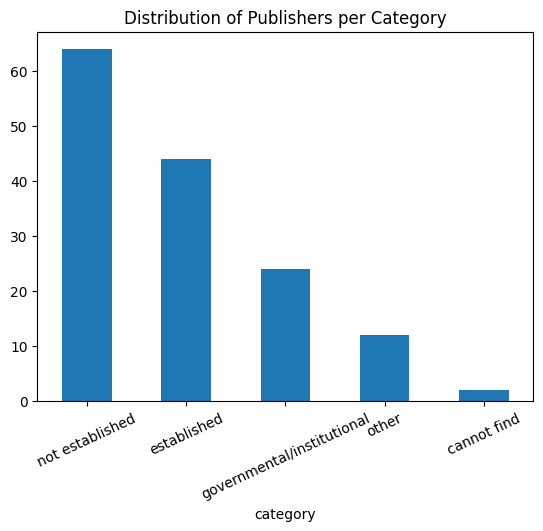

In [21]:
stats_df.value_counts('category').plot(kind='bar', title='Distribution of Publishers per Category', rot=25)

### Established vs not-established

NormaltestResult(statistic=0.4280857477167353, pvalue=0.8073137716243789)


[]

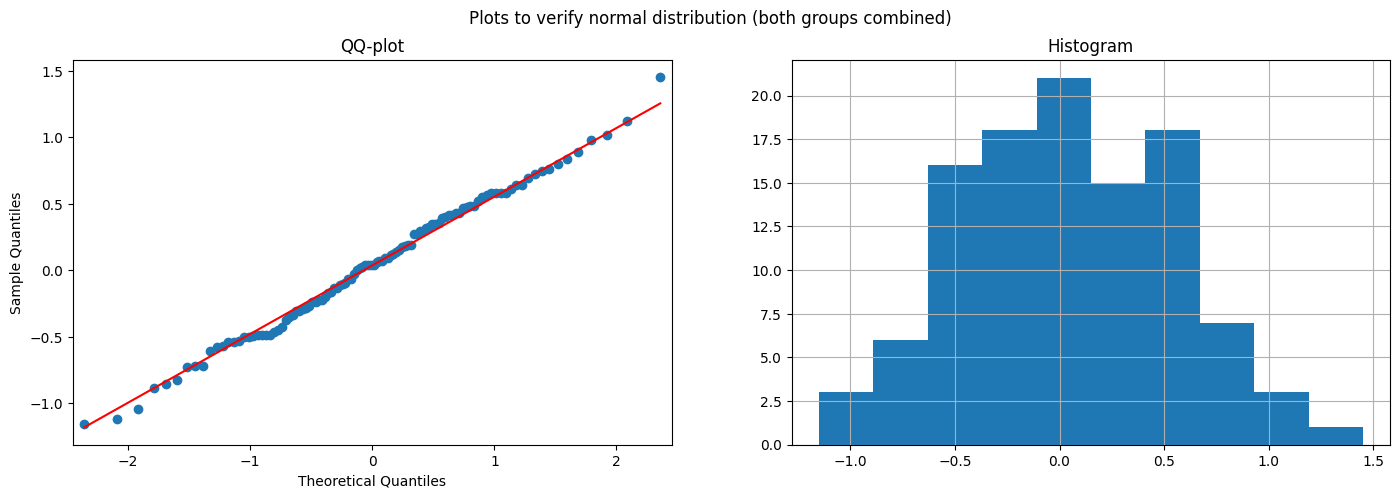

In [131]:
# filter df on only established and not established sources
df_filtered2 = stats_df[
    (stats_df['category'] == 'established') | (stats_df['category'] == 'not established')
]

# test for normal distribution
print(normaltest(df_filtered2['score']))

fig, ax = plt.subplots(1, 2, figsize=(17,5))
fig.suptitle('Plots to verify normal distribution (both groups combined)')

qq_plot = sm.qqplot(df_filtered2['score'], line='s', ax=ax[0]) 
ax[0].set_title('QQ-plot')

hist_plot = df_filtered2['score'].hist(ax=ax[1])
ax[1].set_title('Histogram')

plt.plot()

[]

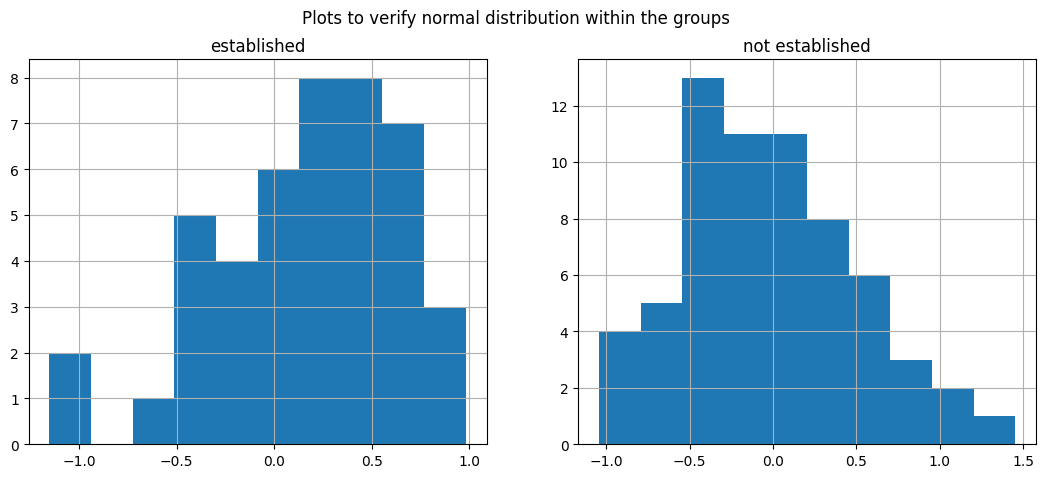

In [127]:
# distribution within each group
fig, ax = plt.subplots(1, 2, figsize=(13,5))
fig.suptitle('Plots to verify normal distribution within the groups')

df_filtered2[df_filtered2['category'] == 'established']['score'].hist(ax=ax[0])
ax[0].set_title('established')

df_filtered2[df_filtered2['category'] == 'not established']['score'].hist(ax=ax[1])
ax[1].set_title('not established')

plt.plot()

<Axes: title={'center': 'score'}, xlabel='category'>

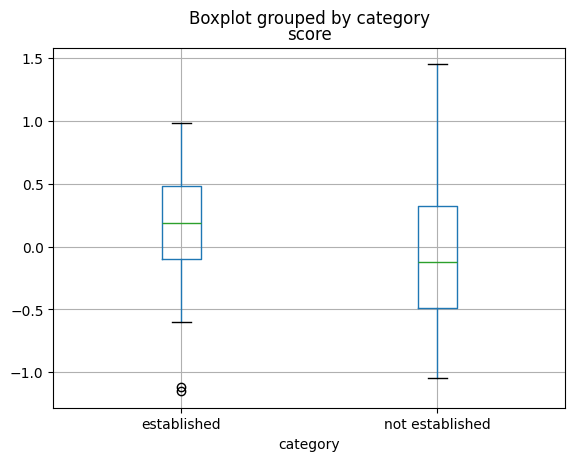

In [23]:
# create boxplot per category
df_filtered2.boxplot(column='score', by='category')

In [24]:
# convert the category column to a binary column
df_filtered2.loc[:, 'category'] = df_filtered2['category'].map(
    {'established': 0, 'not established': 1, 0:0, 1:1} # last two are for the case when the column is already binary
)

result = ttest_ind(
    df_filtered2['score'].to_numpy(), df_filtered2['category'].to_numpy().astype(int)
)

print(
    f't-statistic: {result.statistic}\np-value: {result.pvalue}\ndegrees of freedom: {result.df}'
)

t-statistic: -8.042746272826609
p-value: 5.942282833389287e-14
degrees of freedom: 214.0


### Established / not established / governmental-institutional / other

NormaltestResult(statistic=0.0688750494035952, pvalue=0.9661486982290427)


[]

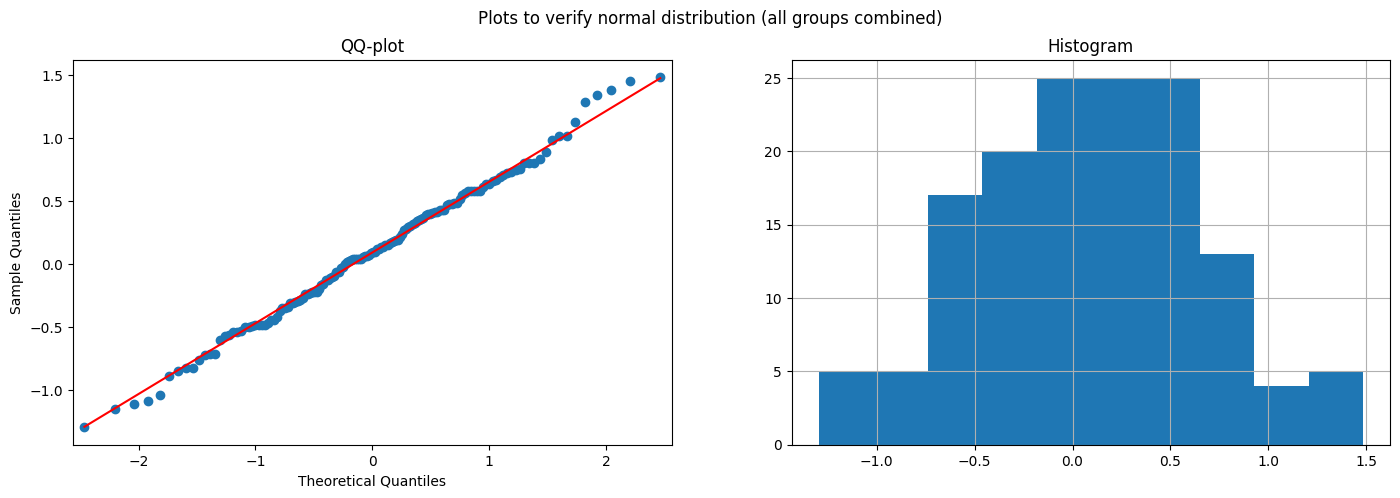

In [129]:
# filter df to remove `cannot find` items
df_filtered4 = stats_df[
    (stats_df['category'] != 'cannot find')
]

# print(f'The resulting categories are: {df_filtered4["category"].unique()}')

# test for normal distribution
print(normaltest(df_filtered4['score']))

fig, ax = plt.subplots(1, 2, figsize=(17,5))
fig.suptitle('Plots to verify normal distribution (all groups combined)')
# ax[0].plot(sm.qqplot(df_filtered4['score'], line='s'))

qq_plot = sm.qqplot(df_filtered4['score'], line='s', ax=ax[0]) 
ax[0].set_title('QQ-plot')

hist_plot = df_filtered4['score'].hist(ax=ax[1])
ax[1].set_title('Histogram')

plt.plot()

Text(0.5, 1.0, 'other')

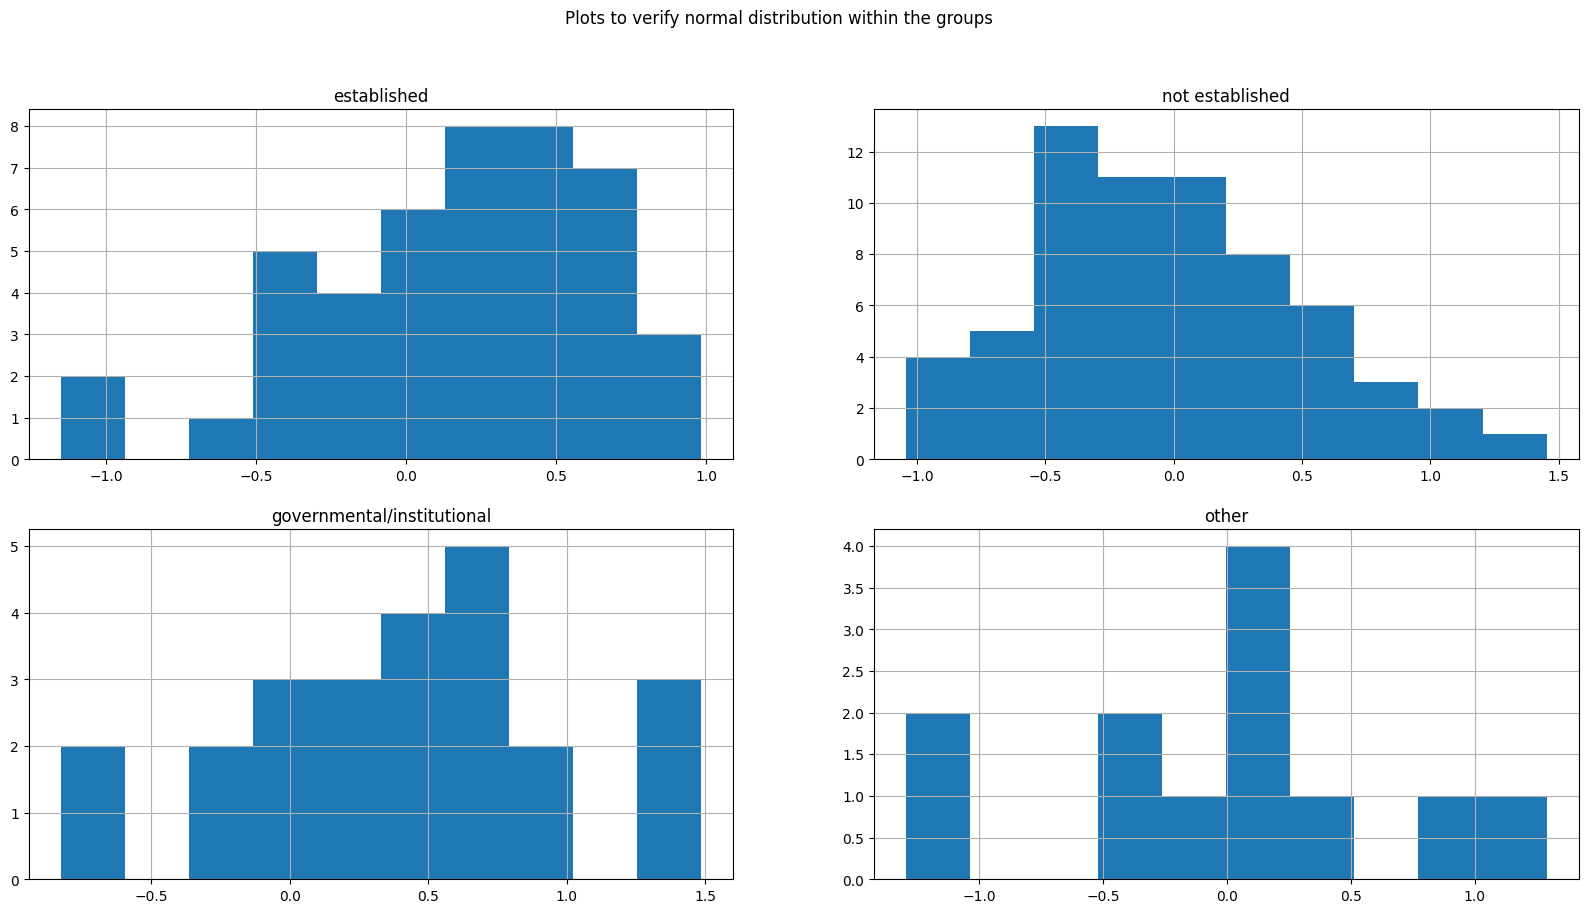

In [114]:
# distribution within each group
fig, ax = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle('Plots to verify normal distribution within the groups')

df_filtered4[df_filtered4['category'] == 'established']['score'].hist(ax=ax[0][0])
ax[0][0].set_title('established')

df_filtered4[df_filtered4['category'] == 'not established']['score'].hist(ax=ax[0][1])
ax[0][1].set_title('not established')

df_filtered4[df_filtered4['category'] == 'governmental/institutional']['score'].hist(ax=ax[1][0])
ax[1][0].set_title('governmental/institutional')

df_filtered4[df_filtered4['category'] == 'other']['score'].hist(ax=ax[1][1])
ax[1][1].set_title('other')


<Axes: title={'center': 'score'}, xlabel='category'>

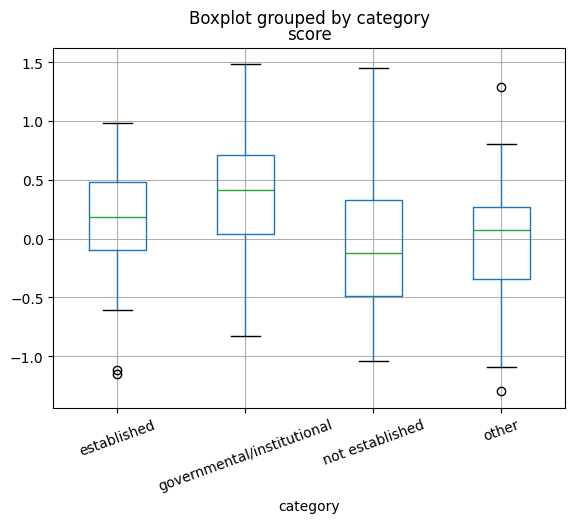

In [26]:
# create boxplot per category
df_filtered4.boxplot(column='score', by='category', rot=20)

In [27]:
model = ols('score ~ C(category)', data=df_filtered4).fit()

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(category),3.577791,3.0,3.977681,0.009342
Residual,41.975110,140.0,NaN,NaN


## Zero-scores

---------------------------- zero_scores_per_task() ----------------------------
                  """Prints the distribution of zero scores"""                  

There are 2200 tasks that did not receive zero scores, and 250 tasks that did receive zero scores.
See the distribution of zero scores below:
--------------------------------------------------------------------------------



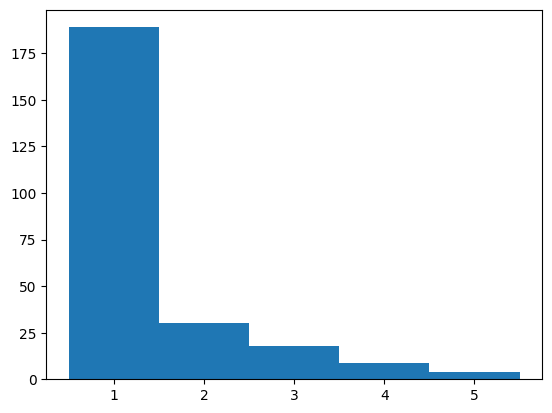

In [42]:
# make histogram of tasks scored with 0
@print_formatting
def zero_scores_per_task(df: pd.DataFrame) -> None:
    """Prints the distribution of zero scores"""

    zero_scores = []
    for task_id in df['task_id'].unique():
        zero_scores.append(df[df['task_id'] == task_id]['score'].value_counts().get(0))
        # print(task_id, zero_scores)

    zero_scores_series = pd.Series(zero_scores)

    print(f'There are {zero_scores_series.isnull().sum()} tasks that did not receive zero scores, and {zero_scores_series.count()} tasks that did receive zero scores.')
    print('See the distribution of zero scores below:')

    # make histogram of tasks scored with 0
    zero_scores_series.hist(bins=5, align='left', grid=False)

zero_scores_per_task(df)

----------------------------- worker_zero_scores() -----------------------------
   """Prints the number of workers that used 0 to score at least one task"""    

47 workers used 0 to score at least one task, and 60 workers did not.
--------------------------------------------------------------------------------



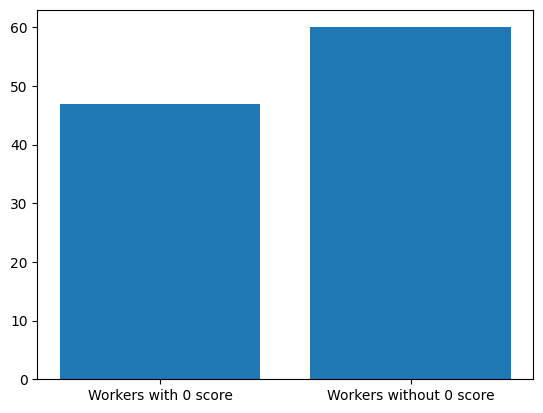

In [43]:
# count how many annotators used 0 to score a task

@print_formatting
def worker_zero_scores(df = pd.DataFrame) -> None:
    """Prints the number of workers that used 0 to score at least one task"""

    workers_with_zero_score = 0
    for worker_id in df['worker_id'].unique():
        if 0 in df[df['worker_id'] == worker_id]['score'].values:
            workers_with_zero_score += 1

    print(f'{workers_with_zero_score} workers used 0 to score at least one task, and {len(df["worker_id"].unique()) - workers_with_zero_score} workers did not.')
    
    plt.bar(['Workers with 0 score', 'Workers without 0 score'], [workers_with_zero_score, len(df["worker_id"].unique()) - workers_with_zero_score])


worker_zero_scores(df)

### Claimant visualization

In [79]:
# add mean worker and mean claimant scores to each example
scatter_df = df.drop('z_score', axis=1)

# add the average z_score per worker to each example the worker provided
scatter_df = pd.merge(df.groupby('worker_id')['z_score'].mean(), scatter_df, on='worker_id')
scatter_df = scatter_df.rename(columns={'z_score': 'z_score_worker'})

scatter_df = pd.merge(df.groupby('source')['z_score'].mean(), scatter_df, on='source')
scatter_df = scatter_df.rename(columns={'z_score': 'z_score_claimant'})

scatter_df

,source,z_score_claimant,worker_id,z_score_worker,task_id,task_response_id,file_id,sentence,tokens_id,publisher,reliability,Optional Comments:,batch_no,score
0,' easytraveler ',-0.034070,3MEG6THYHV69,0.143157,999c9311-7a30-42d9-861e-7bac738db793,455befca-210d-4aa2-ac10-ed8501eb5457,fodors-com_20161027T194550.conll.annot,72,29 30 31,www.fodors.com,2 - The source is somewhat unreliable,NaN,1,2
1,' easytraveler ',-0.034070,AH74XWK3GPFR,0.143157,999c9311-7a30-42d9-861e-7bac738db793,1ab4ce9f-bc01-4bb3-b55a-dbc2b6ad1fd4,fodors-com_20161027T194550.conll.annot,72,29 30 31,www.fodors.com,3 - The source is potentially reliable,NaN,1,3
2,' easytraveler ',-0.034070,APKAYMEPJ3TR,0.041885,999c9311-7a30-42d9-861e-7bac738db793,5148903e-48d1-420a-9c22-c7cc36f7562a,fodors-com_20161027T194550.conll.annot,72,29 30 31,www.fodors.com,4 - The source is somewhat reliable,NaN,1,4
3,' easytraveler ',-0.034070,DQF4H44Q9Y7G,-0.024089,999c9311-7a30-42d9-861e-7bac738db793,7bd7955d-7396-410f-9c64-0c663e2bcb54,fodors-com_20161027T194550.conll.annot,72,29 30 31,www.fodors.com,3 - The source is potentially reliable,NaN,1,3
4,' easytraveler ',-0.034070,K4GKD97M6XT4,0.598885,999c9311-7a30-42d9-861e-7bac738db793,1b9bf6d2-2c3e-4337-8d71-431a41e4f95a,fodors-com_20161027T194550.conll.annot,72,29 30 31,www.fodors.com,4 - The source is somewhat reliable,NaN,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17295,your veterinarian,0.252515,XKEQPPFJWHY9,-0.067701,d6fe72ef-6106-45c8-bdbf-0f9f62960d17,e86875a5-b1e1-44b6-a66b-edd2b1764881,dogsnaturallymagazine-com_20170804T052804.conl...,15,3 4,www.dogsnaturallymagazine.com,4 - The source is somewhat reliable,NaN,4,4
17296,your veterinarian,0.252515,YEKG797EK2HT,0.183123,1779e852-0679-4fcb-896b-3bf89ac609d2,82d13750-f9b6-4694-b69f-681dcd3ba56b,dogsnaturallymagazine-com_20170804T052804.conl...,15,3 4,www.dogsnaturallymagazine.com,4 - The source is somewhat reliable,NaN,5,4
17297,your veterinarian,0.252515,ZRN7M74DZ3QK,-0.112954,9c52e7df-acab-440c-84bb-c4f525a110f9,be6e402e-bfeb-404f-a5ac-d69de891e4be,dogsnaturallymagazine-com_20170804T052804.conl...,15,3 4,www.dogsnaturallymagazine.com,4 - The source is somewhat reliable,NaN,5,4
17298,your veterinarian,0.252515,ZRN7M74DZ3QK,-0.112954,7ada2980-a62b-4d0b-ab32-e63a6436909a,a2910d7d-a81f-43a4-b2b7-58ac1b76dc8e,dogsnaturallymagazine-com_20170804T052804.conl...,15,3 4,www.dogsnaturallymagazine.com,3 - The source is potentially reliable,NaN,5,3


<Axes: xlabel='z_score_claimant', ylabel='z_score_worker'>

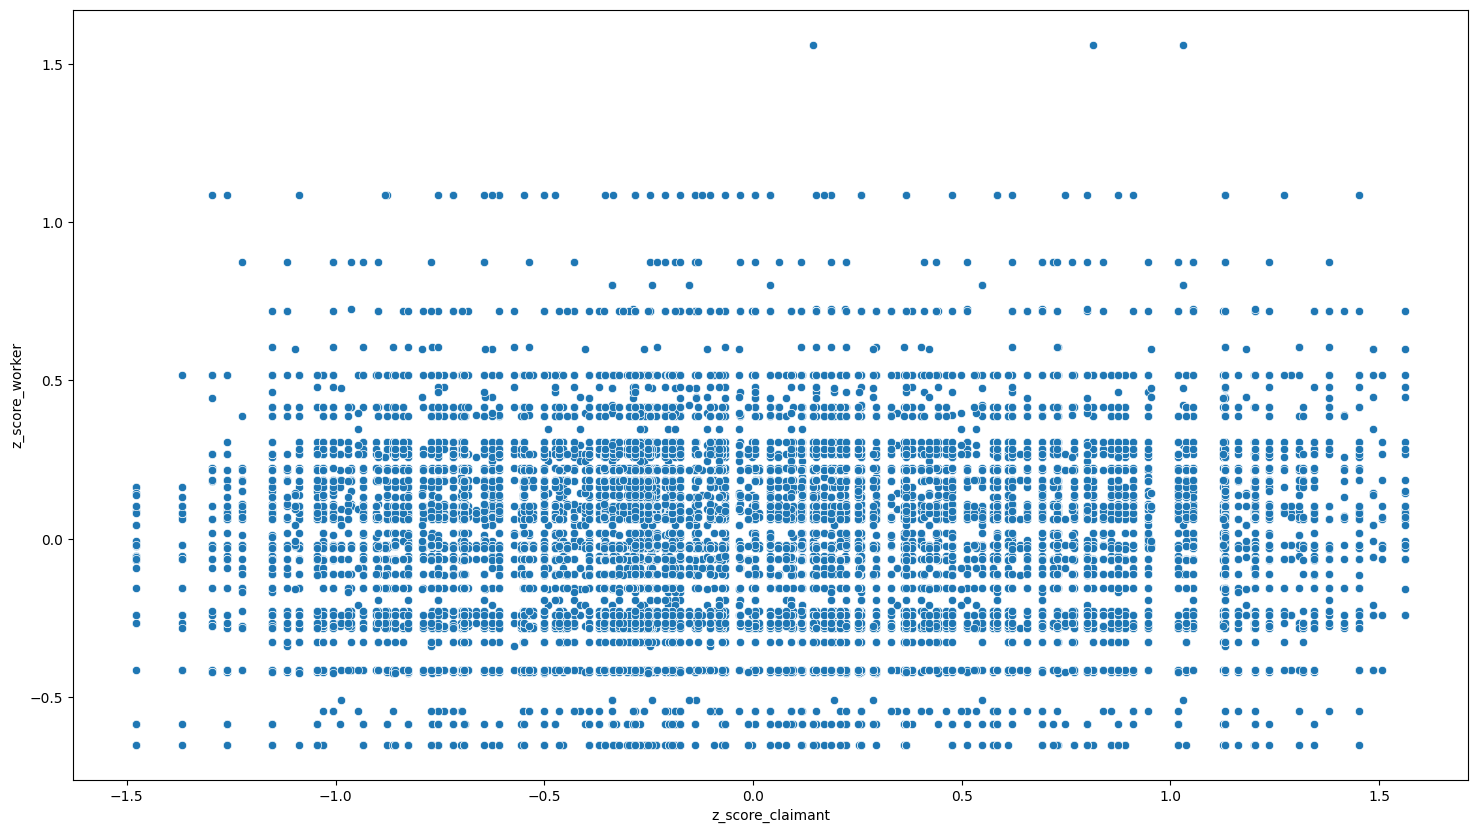

In [86]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='z_score_claimant', y='z_score_worker', data=scatter_df)